# KNN (K-Nearest-Neighbors)
Used for both regression and classification

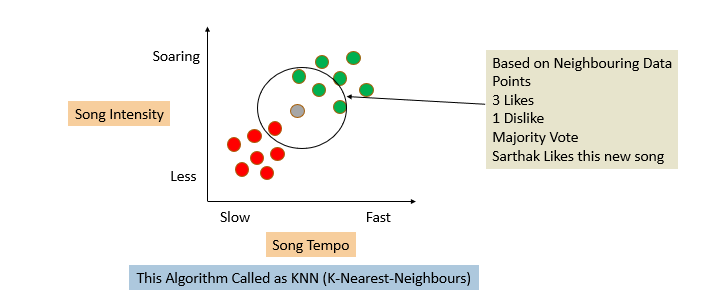

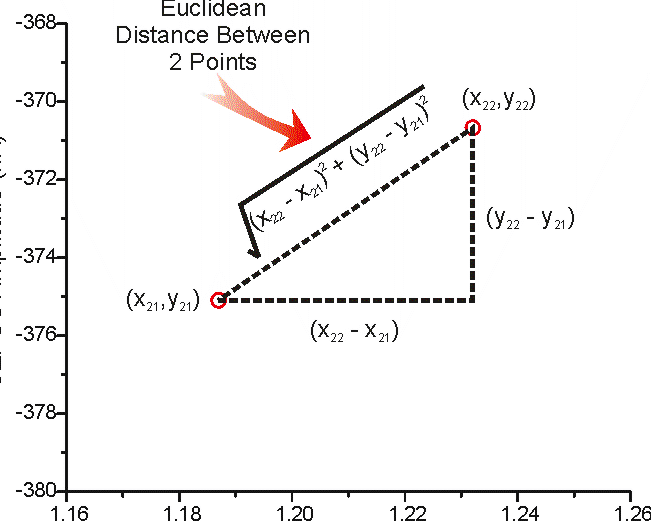

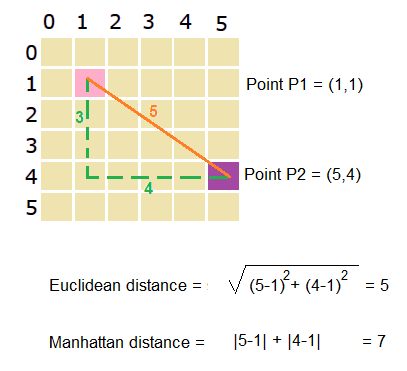

### Internally Eucledian Distance is used in KNN
### KNN is suitable only for small datasets upto 2000 rows

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1 - Read the dataset

In [2]:
import pandas as pd 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2 - Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

### Step 3: Seperate X and Y

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [9]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

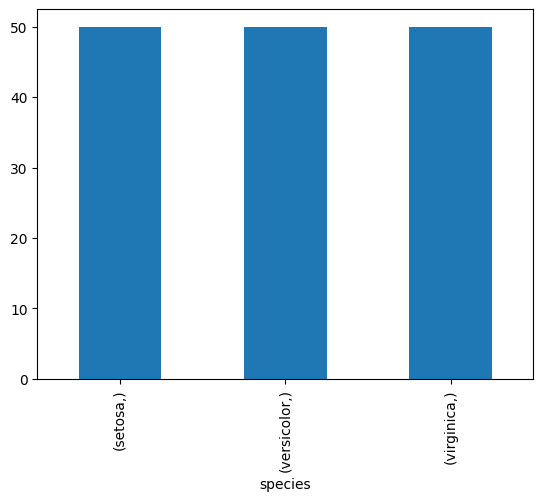

In [10]:
Y.value_counts().plot(kind='bar')

### Step 4: Perform Preprocessing on X

In [11]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

### Because no categorical feature is present i will create only a numerical pipeline

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Step 5: Apply train test split
test_size=0.33

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [17]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [20]:
xtrain.shape

(100, 4)

In [21]:
xtest.shape

(50, 4)

### Step 6: Build KNN Model

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=35)
model1.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=35)

In [23]:
model1.score(xtrain, ytrain)

0.87

In [24]:
model1.score(xtest, ytest)

0.88

### Hyperparameter tuning

In [25]:
params = {"n_neighbors":[3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [26]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv1 = GridSearchCV(knn, param_grid=params, cv=5, scoring="f1_macro")
gscv1.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [27]:
gscv1.best_params_

{'n_neighbors': 3}

In [28]:
gscv1.best_score_

np.float64(0.9319552669552669)

In [29]:
best_knn = gscv1.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [30]:
best_knn.score(xtrain, ytrain)

0.95

In [31]:
best_knn.score(xtest, ytest)

0.98

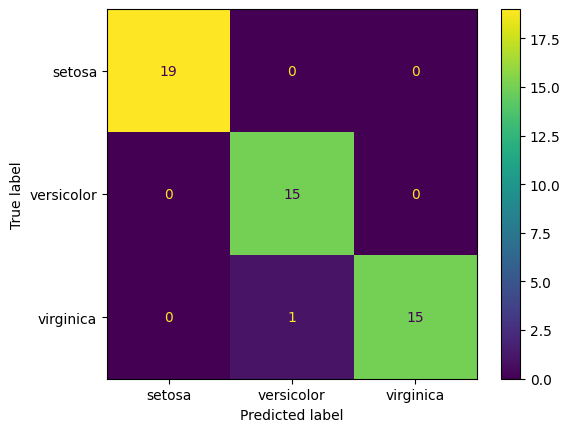

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_knn, xtest, ytest)

In [33]:
ypred_train = best_knn.predict(xtrain)
ypred_test = best_knn.predict(xtest)

In [34]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [36]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [37]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [38]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [40]:
gscv1.best_score_

np.float64(0.9319552669552669)

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_knn, xtrain, ytrain, cv=5, scoring="f1_macro")
scores

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [42]:
scores.mean()

np.float64(0.9319552669552669)

### Above model is a good model because it has cross validated f1 macro of 0.9319 > 0.8 

### Out of Sample Prediction

In [43]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [44]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [45]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.336478,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,-0.131979,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.132510


In [46]:
preds = best_knn.predict(xnew_pre)
probs = best_knn.predict_proba(xnew_pre)

In [47]:
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [48]:
probs

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

In [49]:
best_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [50]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667])

In [51]:
xnew["species_pred"] = preds 
xnew["probability"] = max_probs

In [52]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probability
0,5.5,2.5,4.0,1.3,versicolor,1.000000
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,1.000000
3,4.4,2.9,NaN,0.2,setosa,1.000000
4,5.9,3.0,5.1,1.8,virginica,0.666667
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,1.000000
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


In [53]:
xnew['species_pred'].value_counts()

species_pred
versicolor    7
virginica     4
setosa        4
Name: count, dtype: int64

In [54]:
xnew.to_csv("KNNResults.csv", index=False)

### Once completed type done in chat
### Next topic SVM starting sharp at 10:25 am

In [77]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [78]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [79]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [80]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


# SVM - Support Vector machine
1. This algorithm will create a hyperplane between 2 classses
2. it try to maximize the margin
3. The points which lie on margin are called support vectors
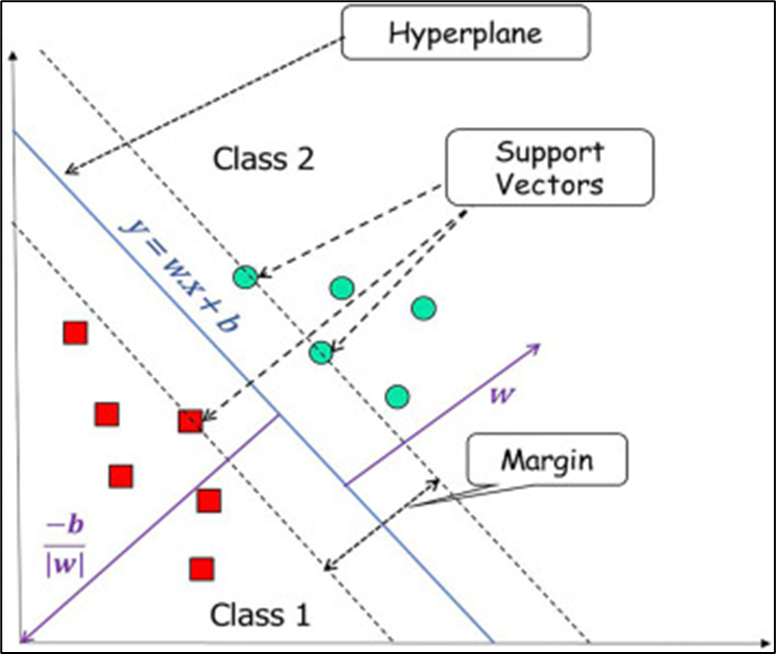

In [81]:
from sklearn.svm import SVC
model_svm = SVC(probability=True)
model_svm.fit(xtrain, ytrain)

SVC(probability=True)

### Evaluate SVM model

In [82]:
model_svm.score(xtrain, ytrain)

0.97

In [83]:
model_svm.score(xtest, ytest)

0.98

In [92]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(model_svm, xtrain, ytrain, cv=5, scoring="f1_macro")
scores2

array([1.        , 0.80952381, 0.90277778, 1.        , 0.94747475])

In [93]:
scores2.mean()

np.float64(0.9319552669552669)

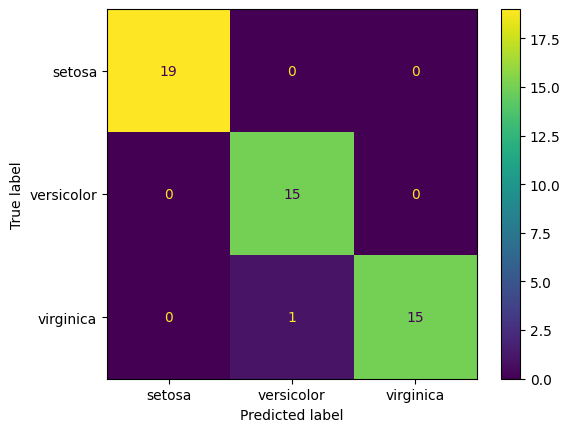

In [86]:
ConfusionMatrixDisplay.from_estimator(model_svm, xtest, ytest)

In [87]:
ypred_train2 = model_svm.predict(xtrain)
ypred_test2 = model_svm.predict(xtest)

In [88]:
ypred_test2[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [89]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [91]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Perform out of sample prediction

In [94]:
xnew2 = pd.read_csv("iris_sample.csv")
xnew2

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [95]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [96]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.336478,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,-0.131979,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.132510


In [97]:
preds2 = model_svm.predict(xnew2_pre)
probs2 = model_svm.predict_proba(xnew2_pre)

In [98]:
preds2

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [99]:
probs2

array([[0.00806903, 0.96922534, 0.02270564],
       [0.01299898, 0.02104342, 0.9659576 ],
       [0.03349032, 0.9515826 , 0.01492707],
       [0.4817985 , 0.41085568, 0.10734582],
       [0.01450992, 0.22483903, 0.76065105],
       [0.95896238, 0.0236805 , 0.01735711],
       [0.03746377, 0.95174943, 0.01078679],
       [0.01111013, 0.0407645 , 0.94812537],
       [0.9657488 , 0.01913211, 0.01511908],
       [0.7657682 , 0.17114562, 0.06308617],
       [0.01299352, 0.97932625, 0.00768023],
       [0.01332281, 0.97938   , 0.00729719],
       [0.01865953, 0.02067576, 0.96066471],
       [0.01941524, 0.75995959, 0.22062517],
       [0.02130621, 0.60405627, 0.37463752]])

In [100]:
model_svm.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [101]:
import numpy as np 
max_probs2 = np.max(probs2, axis=1)
max_probs2

array([0.96922534, 0.9659576 , 0.9515826 , 0.4817985 , 0.76065105,
       0.95896238, 0.95174943, 0.94812537, 0.9657488 , 0.7657682 ,
       0.97932625, 0.97938   , 0.96066471, 0.75995959, 0.60405627])

In [102]:
xnew2["species_pred"] = preds2
xnew2["probability"] = max_probs2

In [103]:
xnew2

,sepal_length,sepal_width,petal_length,petal_width,species_pred,probability
0,5.5,2.5,4.0,1.3,versicolor,0.969225
1,6.9,3.1,5.1,2.3,virginica,0.965958
2,5.1,2.5,3.0,1.1,versicolor,0.951583
3,4.4,2.9,NaN,0.2,setosa,0.481799
4,5.9,3.0,5.1,1.8,virginica,0.760651
5,5.5,3.5,1.3,0.2,setosa,0.958962
6,5.6,NaN,3.6,1.3,versicolor,0.951749
7,6.5,3.0,5.2,2.0,virginica,0.948125
8,5.3,3.7,1.5,0.2,setosa,0.965749
9,5.1,3.4,1.5,NaN,setosa,0.765768


In [104]:
xnew2.to_csv("SVMResults.csv", index=False)